In [1]:
from collections import OrderedDict 
import numpy as np 
import torch 
from torch import optim 
import torch.nn as nn 
import torchvision 
from torchvision import transforms,models 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
%pwd
import os 
os.chdir("..")
%pwd

'd:\\ML_Projects'

In [4]:
train_dir="dataset/transferlearning/train"
test_dir="dataset/transferlearning/test"

In [5]:
transform = transforms.Compose([transforms.Resize(255), 
    transforms.CenterCrop(224), 
    transforms.ToTensor()]) 
 
dataset = torchvision.datasets.ImageFolder(train_dir, transform= transform) 
train_loader = torch.utils.data.DataLoader(dataset, batch_size=128,shuffle=True) 

dataset = torchvision.datasets.ImageFolder(test_dir, transform= transform) 
test_loader = torch.utils.data.DataLoader(dataset, batch_size=128,shuffle=True) 

In [6]:
model = models.densenet121(pretrained = True) 

c:\Users\prane\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\prane\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\prane/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:03<00:00, 10.3MB/s]


In [7]:
for params in model.parameters():
    params.requires_grad = False

In [10]:
model.classifier = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(1024,1)),
    ('Output',nn.Sigmoid())
]))

In [11]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [12]:
opt = optim.Adam(model.classifier.parameters()) 
loss_function = nn.BCELoss() 
train_losses=[] 

In [13]:
model.train()

NUM_EPOCHS = 10

for epoch in range(NUM_EPOCHS):
    train_loss= 0
    test_loss= 0
    for bat,(img,label) in enumerate(train_loader):
        opt.zero_grad()
                # forward pass
        output = model(img) 

        # calc losses
        loss = loss_function(output.squeeze(),label.float()) 

        # propagate losses
        loss.backward() 

        # update weights
        opt.step() 

        # update current train loss
        train_loss += loss.item() 
 
    
    train_losses.append(train_loss) 
    print(f"epoch: {epoch}, train_loss: {train_loss}")

epoch: 0, train_loss: 1.4279672503471375
epoch: 1, train_loss: 1.2770333886146545
epoch: 2, train_loss: 1.143449068069458
epoch: 3, train_loss: 1.027249813079834
epoch: 4, train_loss: 0.9104925096035004
epoch: 5, train_loss: 0.8130307495594025
epoch: 6, train_loss: 0.7479108273983002
epoch: 7, train_loss: 0.6808167994022369
epoch: 8, train_loss: 0.6157463192939758
epoch: 9, train_loss: 0.5597399473190308


C:\Users\prane\AppData\Local\Temp\ipykernel_3484\3888801600.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(f"Pred: {class_labels[int(y_pred[i])]}, True: {class_labels[int(y_test[i])]}")


ValueError: num must be an integer with 1 <= num <= 16, not 17

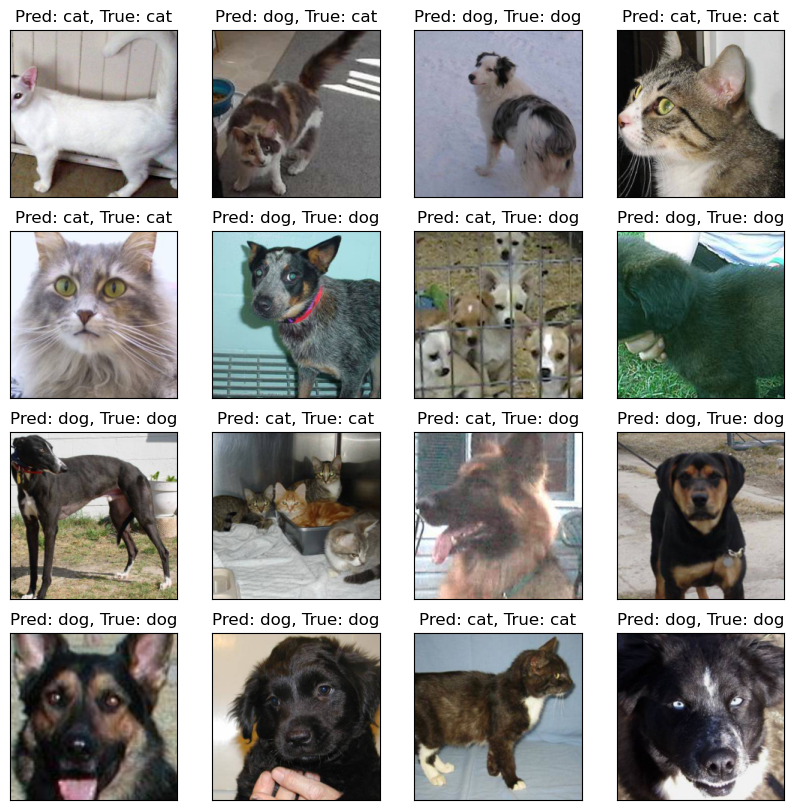

In [29]:

# Assuming you have a test_loader, model, and class_labels set up

# Create a figure for plotting
fig = plt.figure(figsize=(10, 10))

# Class labels
class_labels = {0: 'cat', 1: 'dog'}

# Get a batch of test data
X_test, y_test = next(iter(test_loader))

# Perform predictions
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = torch.round(y_pred)  # Assuming it's a binary classification model
    y_pred = y_pred.numpy()

# Plot some of the images with their predicted and actual labels
for i in range(len(X_test)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plt.imshow(X_test[i].permute(1, 2, 0))  # Adjust if needed based on the shape of X_test
    ax.set_title(f"Pred: {class_labels[int(y_pred[i])]}, True: {class_labels[int(y_test[i])]}")
    
plt.show()
